In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [103]:
import matplotlib.pyplot as plt
import os
import pickle
import scipy.stats

In [3]:
figsize(12,12)
plt.rcParams.update({'font.size': 12})

In [67]:
spl_vals = {}
success_vals = {}

In [68]:
# # listed in the same order as in "Sim2Real Predictivity: Does Evaluation in Simulation Predict Real-World Performance?" by Kadian et al.

spl_vals["reality"] = {}
spl_vals["reality"]["depth_train_sliding_off_train_noise_multiplier_0.5"]           = 0.59
spl_vals["reality"]["depth_train_sliding_off_train_noise_multiplier_1.0"]           = 0.74
spl_vals["reality"]["predicted_depth_train_sliding_off_train_noise_multiplier_0.5"] = 0.53
spl_vals["reality"]["predicted_depth_train_sliding_off_train_noise_multiplier_1.0"] = 0.66
spl_vals["reality"]["rgb_train_sliding_off_train_noise_multiplier_0.5"]             = 0.33
spl_vals["reality"]["rgb_train_sliding_off_train_noise_multiplier_1.0"]             = 0.44
spl_vals["reality"]["depth_train_sliding_on_train_noise_multiplier_0.0"]            = 0.64
spl_vals["reality"]["predicted_depth_train_sliding_on_train_noise_multiplier_0.0"]  = 0.58
spl_vals["reality"]["rgb_train_sliding_on_train_noise_multiplier_0.0"]              = 0.61

# spl_vals["challenge_sim_reported"] = {}
# spl_vals["challenge_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_0.5"]           = 0.68
# spl_vals["challenge_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_1.0"]           = 0.78
# spl_vals["challenge_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_0.5"] = 0.54
# spl_vals["challenge_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_1.0"] = 0.64
# spl_vals["challenge_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_0.5"]             = 0.56
# spl_vals["challenge_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_1.0"]             = 0.58
# spl_vals["challenge_sim_reported"]["depth_train_sliding_on_train_noise_multiplier_0.0"]            = 0.66
# spl_vals["challenge_sim_reported"]["predicted_depth_train_sliding_on_train_noise_multiplier_0.0"]  = 0.56
# spl_vals["challenge_sim_reported"]["rgb_train_sliding_on_train_noise_multiplier_0.0"]              = 0.62

# spl_vals["test_sim_reported"] = {}
# spl_vals["test_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_0.5"]           = 0.59
# spl_vals["test_sim_reported"]["depth_train_sliding_off_train_noise_multiplier_1.0"]           = 0.53
# spl_vals["test_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_0.5"] = 0.40
# spl_vals["test_sim_reported"]["predicted_depth_train_sliding_off_train_noise_multiplier_1.0"] = 0.43
# spl_vals["test_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_0.5"]             = 0.43
# spl_vals["test_sim_reported"]["rgb_train_sliding_off_train_noise_multiplier_1.0"]             = 0.36
# spl_vals["test_sim_reported"]["depth_train_sliding_on_train_noise_multiplier_0.0"]            = 0.35
# spl_vals["test_sim_reported"]["predicted_depth_train_sliding_on_train_noise_multiplier_0.0"]  = 0.32
# spl_vals["test_sim_reported"]["rgb_train_sliding_on_train_noise_multiplier_0.0"]              = 0.36

In [72]:
data_dir = "/Users/mroberts/code/github/interiorsim/code/experiments/srcc/data"

sim_eval_modes = ["challenge_sim", "test_sim"]
model_names = ["rgb_train_sliding_on_train_noise_multiplier_0.0",
               "rgb_train_sliding_off_train_noise_multiplier_0.5",
               "rgb_train_sliding_off_train_noise_multiplier_1.0",
               "depth_train_sliding_on_train_noise_multiplier_0.0",
               "depth_train_sliding_off_train_noise_multiplier_0.5",
               "depth_train_sliding_off_train_noise_multiplier_1.0",
               "predicted_depth_train_sliding_on_train_noise_multiplier_0.0",
               "predicted_depth_train_sliding_off_train_noise_multiplier_0.5",
               "predicted_depth_train_sliding_off_train_noise_multiplier_1.0"]

sim_name = "habitat_gibson_val"

In [99]:
sim_eval_mode = "challenge_sim"
model_name    = "rgb_train_sliding_on_train_noise_multiplier_0.0"

pickle_file = os.path.join(data_dir, sim_name + "_" + sim_eval_mode + "_" + model_name + ".pickle")
with open(pickle_file, "rb") as p:
    stats_episodes = pickle.load(p)

# for s in stats_episodes.items():
#     print(s[0])

# print(list(stats_episodes)[0])
# print(list(stats_episodes.items())[0])

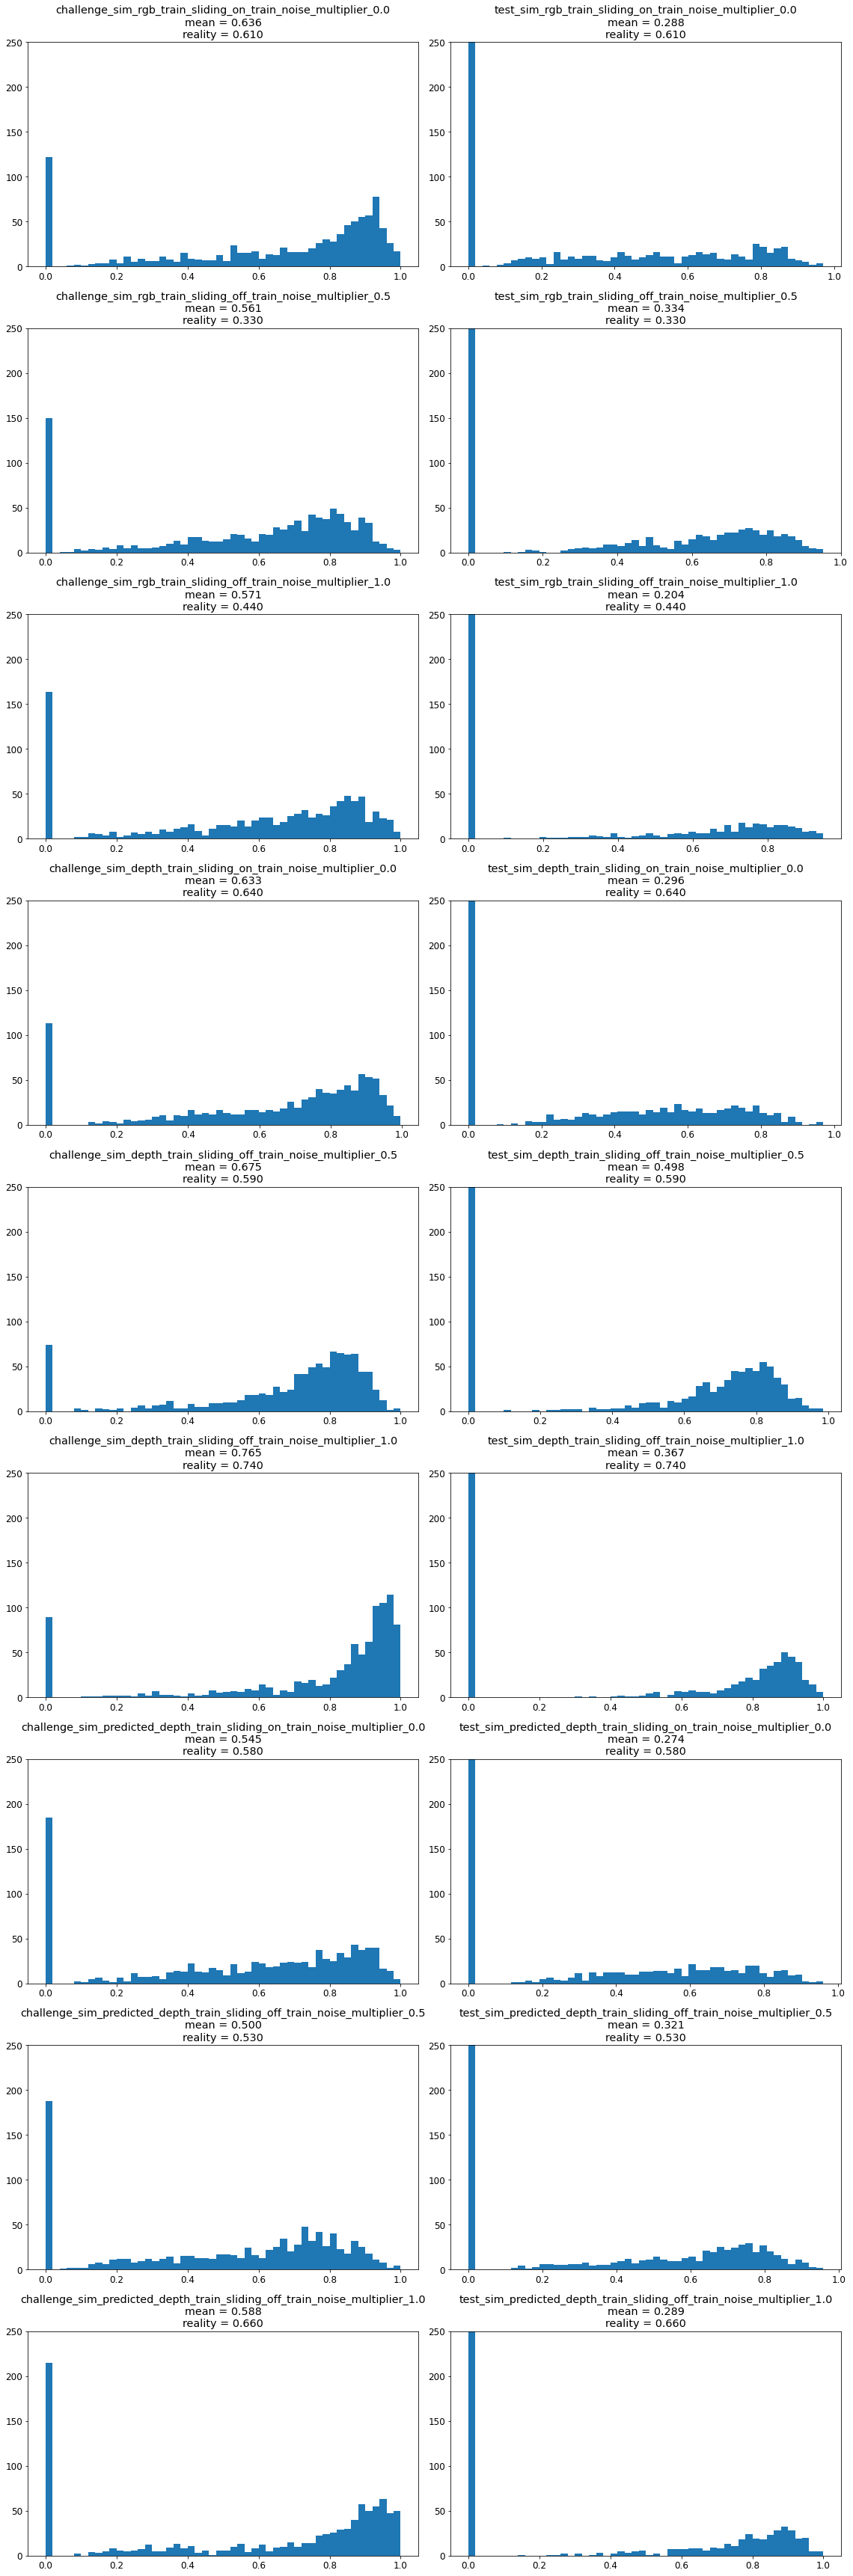

In [100]:
def compute_stats(sim_eval_mode, model_name):

    pickle_file = os.path.join(data_dir, sim_name + "_" + sim_eval_mode + "_" + model_name + ".pickle")
    with open(pickle_file, "rb") as p:
        stats_episodes = pickle.load(p)

    valid = np.array([ np.isfinite(s[1]["distance_to_goal"]) for s in stats_episodes.items() ])
    
    spl = np.array([ s[1]["spl"] for s in stats_episodes.items() ])
    success = np.array([ s[1]["success"] for s in stats_episodes.items() ])

    spl = spl[valid]
    success = success[valid]

#     spl = np.mean(spl)
#     success = np.mean(success)

    return spl, success



success_vals = {}

for sim_eval_mode in sim_eval_modes:
    spl_vals[sim_eval_mode] = {}
    success_vals[sim_eval_mode] = {}
    for model_name in model_names:
        spl, success = compute_stats(sim_eval_mode, model_name)
        spl_vals[sim_eval_mode][model_name] = spl
        success_vals[sim_eval_mode][model_name] = success

figsize(16,48)

i = 1
for model_name in spl_vals[sim_eval_mode].keys():
    for sim_eval_mode in ["challenge_sim", "test_sim"]:

#         print(sim_eval_mode)
#         print(model_name)
#         print(spl_vals[sim_eval_mode][model_name].shape)

        subplot(9,2,i)
        hist(spl_vals[sim_eval_mode][model_name], bins=50)
        title(
            sim_eval_mode + "_" + model_name + "\n" +
            "mean = " + "%0.3f" % np.mean(spl_vals[sim_eval_mode][model_name]) + "\n" +
            "reality = " + "%0.3f" % np.mean(spl_vals["reality"][model_name]))
        ylim(0,250)
        
        i = i+1

tight_layout()

['data/scene_datasets/gibson/Pablo.glb', 'data/scene_datasets/gibson/Eastville.glb', 'data/scene_datasets/gibson/Greigsville.glb', 'data/scene_datasets/gibson/Denmark.glb', 'data/scene_datasets/gibson/Swormville.glb', 'data/scene_datasets/gibson/Edgemere.glb', 'data/scene_datasets/gibson/Ribera.glb', 'data/scene_datasets/gibson/Sisters.glb', 'data/scene_datasets/gibson/Cantwell.glb', 'data/scene_datasets/gibson/Scioto.glb', 'data/scene_datasets/gibson/Eudora.glb', 'data/scene_datasets/gibson/Sands.glb', 'data/scene_datasets/gibson/Elmira.glb', 'data/scene_datasets/gibson/Mosquito.glb']
r = 0.9424696043851616


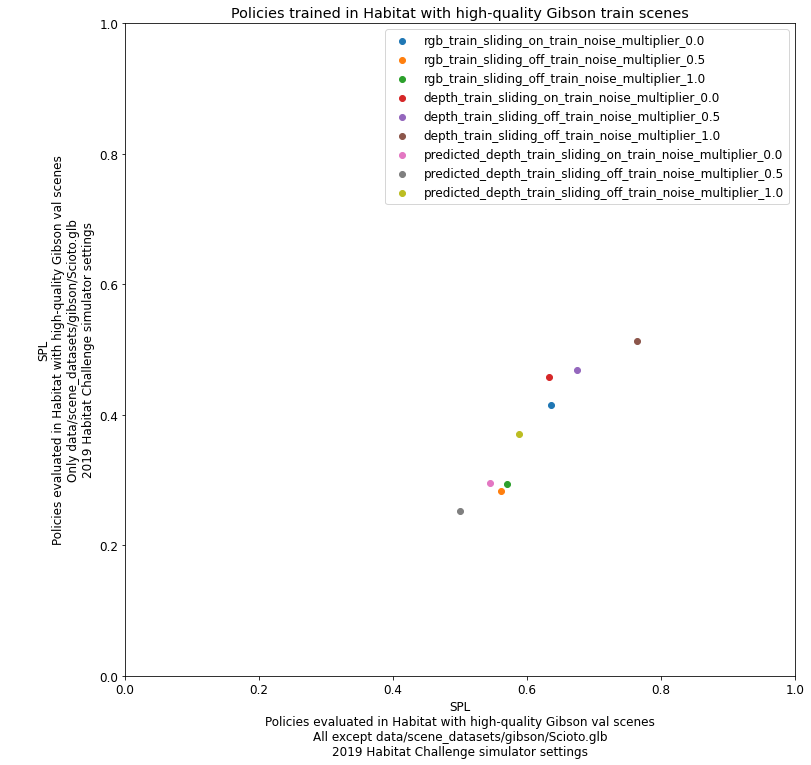

In [257]:
def compute_stats(sim_eval_mode, model_name, include_name=None, exclude_name=None):

    pickle_file = os.path.join(data_dir, sim_name + "_" + sim_eval_mode + "_" + model_name + ".pickle")
    with open(pickle_file, "rb") as p:
        stats_episodes = pickle.load(p)

    assert include_name is None or exclude_name is None
    assert include_name is not None or exclude_name is not None

    stats_episodes_items = [ s for s in stats_episodes.items() if s[0][0] == include_name ]
    
    if include_name is not None:
        stats_episodes_items = [ s for s in stats_episodes.items() if s[0][0] == include_name ]

    if exclude_name is not None:            
        stats_episodes_items = [ s for s in stats_episodes.items() if s[0][0] != include_name ]
        
    valid = np.array([ np.isfinite(s[1]["distance_to_goal"]) for s in stats_episodes_items ])

    spl = np.array([ s[1]["spl"] for s in stats_episodes_items ])
    success = np.array([ s[1]["success"] for s in stats_episodes_items ])

    spl = spl[valid]
    success = success[valid]

    spl = np.mean(spl)
    success = np.mean(success)

    return spl, success



spl_vals_almost_all_scenes = {}
success_vals_almost_all_scenes = {}
spl_vals_one_scene = {}
success_vals_one_scene = {}

scene_names = list(set([ s[0][0] for s in stats_episodes.items() ]))
print(scene_names)

# include_exclude_name = scene_names[ np.random.randint(0, len(scene_names)) ]
# print(include_exclude_name)

include_exclude_name = "data/scene_datasets/gibson/Scioto.glb"

for sim_eval_mode in sim_eval_modes:
    
    spl_vals_almost_all_scenes[sim_eval_mode] = {}
    success_vals_almost_all_scenes[sim_eval_mode] = {}
    spl_vals_one_scene[sim_eval_mode] = {}
    success_vals_one_scene[sim_eval_mode] = {}
    
    for model_name in model_names:
        
        spl, success = compute_stats(sim_eval_mode, model_name, exclude_name=include_exclude_name)
        spl_vals_almost_all_scenes[sim_eval_mode][model_name] = spl
        success_vals_almost_all_scenes[sim_eval_mode][model_name] = success

        spl, success = compute_stats(sim_eval_mode, model_name, include_name=include_exclude_name)
        spl_vals_one_scene[sim_eval_mode][model_name] = spl
        success_vals_one_scene[sim_eval_mode][model_name] = success



figsize(12,12)

x = []
y = []
for model_name in model_names:
    x.append(spl_vals_almost_all_scenes["challenge_sim"][model_name])
    y.append(spl_vals_one_scene["challenge_sim"][model_name])
    scatter(spl_vals_almost_all_scenes["challenge_sim"][model_name], spl_vals_one_scene["challenge_sim"][model_name], label=model_name)

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

title("Policies trained in Habitat with high-quality Gibson train scenes");
xlabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nAll except " + include_exclude_name + "\n2019 Habitat Challenge simulator settings");
ylabel("\n\nSPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nOnly " + include_exclude_name + "\n2019 Habitat Challenge simulator settings");
ylim(0,1);
xlim(0,1);
legend();

['data/scene_datasets/gibson/Pablo.glb', 'data/scene_datasets/gibson/Eastville.glb', 'data/scene_datasets/gibson/Greigsville.glb', 'data/scene_datasets/gibson/Denmark.glb', 'data/scene_datasets/gibson/Swormville.glb', 'data/scene_datasets/gibson/Edgemere.glb', 'data/scene_datasets/gibson/Ribera.glb', 'data/scene_datasets/gibson/Sisters.glb', 'data/scene_datasets/gibson/Cantwell.glb', 'data/scene_datasets/gibson/Scioto.glb', 'data/scene_datasets/gibson/Eudora.glb', 'data/scene_datasets/gibson/Sands.glb', 'data/scene_datasets/gibson/Elmira.glb', 'data/scene_datasets/gibson/Mosquito.glb']
r = 0.5103211546778714


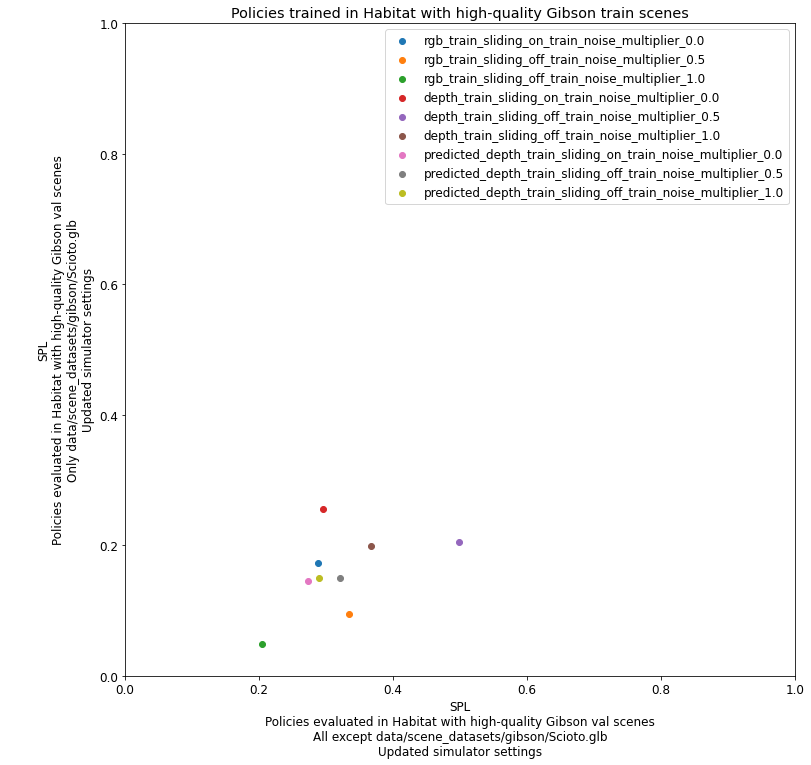

In [255]:
def compute_stats(sim_eval_mode, model_name, include_name=None, exclude_name=None):

    pickle_file = os.path.join(data_dir, sim_name + "_" + sim_eval_mode + "_" + model_name + ".pickle")
    with open(pickle_file, "rb") as p:
        stats_episodes = pickle.load(p)

    assert include_name is None or exclude_name is None
    assert include_name is not None or exclude_name is not None

    stats_episodes_items = [ s for s in stats_episodes.items() if s[0][0] == include_name ]
    
    if include_name is not None:
        stats_episodes_items = [ s for s in stats_episodes.items() if s[0][0] == include_name ]

    if exclude_name is not None:            
        stats_episodes_items = [ s for s in stats_episodes.items() if s[0][0] != include_name ]
        
    valid = np.array([ np.isfinite(s[1]["distance_to_goal"]) for s in stats_episodes_items ])

    spl = np.array([ s[1]["spl"] for s in stats_episodes_items ])
    success = np.array([ s[1]["success"] for s in stats_episodes_items ])

    spl = spl[valid]
    success = success[valid]

    spl = np.mean(spl)
    success = np.mean(success)

    return spl, success



spl_vals_almost_all_scenes = {}
success_vals_almost_all_scenes = {}
spl_vals_one_scene = {}
success_vals_one_scene = {}

scene_names = list(set([ s[0][0] for s in stats_episodes.items() ]))
print(scene_names)

# include_exclude_name = scene_names[ np.random.randint(0, len(scene_names)) ]
# print(include_exclude_name)

include_exclude_name = "data/scene_datasets/gibson/Scioto.glb"

for sim_eval_mode in sim_eval_modes:
    
    spl_vals_almost_all_scenes[sim_eval_mode] = {}
    success_vals_almost_all_scenes[sim_eval_mode] = {}
    spl_vals_one_scene[sim_eval_mode] = {}
    success_vals_one_scene[sim_eval_mode] = {}
    
    for model_name in model_names:
        
        spl, success = compute_stats(sim_eval_mode, model_name, exclude_name=include_exclude_name)
        spl_vals_almost_all_scenes[sim_eval_mode][model_name] = spl
        success_vals_almost_all_scenes[sim_eval_mode][model_name] = success

        spl, success = compute_stats(sim_eval_mode, model_name, include_name=include_exclude_name)
        spl_vals_one_scene[sim_eval_mode][model_name] = spl
        success_vals_one_scene[sim_eval_mode][model_name] = success



figsize(12,12)

x = []
y = []
for model_name in model_names:
    x.append(spl_vals_almost_all_scenes["test_sim"][model_name])
    y.append(spl_vals_one_scene["test_sim"][model_name])
    scatter(spl_vals_almost_all_scenes["test_sim"][model_name], spl_vals_one_scene["test_sim"][model_name], label=model_name)

r, p_val = scipy.stats.pearsonr(x, y)
print("r =", r)

title("Policies trained in Habitat with high-quality Gibson train scenes");
xlabel("SPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nAll except " + include_exclude_name + "\nUpdated simulator settings");
ylabel("\n\nSPL\nPolicies evaluated in Habitat with high-quality Gibson val scenes\nOnly " + include_exclude_name + "\nUpdated simulator settings");
ylim(0,1);
xlim(0,1);
legend();